 # KNN Classifier


In [1]:
from src.data import Data
from src.plothelp import *
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
%matplotlib inline  

In [2]:
data = Data("img")
data.load_pickle("100x100.pickle ")
X_train, X_test, y_train, y_test = data.train_test_split()

In [3]:
X_trains = np.asarray(X_train).reshape((len(X_train), -1))
X_tests = np.asarray(X_test).reshape((len(X_test), -1))
y_trains = np.asarray(y_train)
y_tests = np.asarray(y_test)
print(X_trains.shape, X_tests.shape, y_trains.shape, y_tests.shape)

(4698, 30000) (522, 30000) (4698,) (522,)


In [4]:
start = time.time()
neigh = KNeighborsClassifier(n_neighbors=18)
neigh.fit(X_trains,  y_trains)
end = time.time()
elapsed = end - start
print("Classifier train in ", elapsed, "seconds")

Classifier train in  49.92044687271118 seconds


In [4]:
start = time.time()
y =neigh.predict(X_tests)
end = time.time()
elapsed = end - start
print("Classifier tested in ", elapsed, "seconds")

Classifier tested in  158.88989186286926 seconds


K-NN 45.5938697318 %
Confusion matrix, without normalization
[[60 25 48  6]
 [46 77 47 20]
 [ 0  0  3  1]
 [33 25 33 98]]


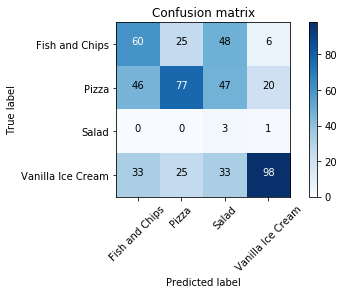

In [5]:
accuracy = accuracy_score(y, y_tests)
print("K-NN", accuracy * 100, "%")
matrix = confusion_matrix(y,y_tests)
plot_confusion_matrix(matrix,neigh.classes_)

## Search for the best Hyper paremeters

In [8]:
parameter_grid = {"n_neighbors": np.arange(1,31,2), "weights": ["uniform", "distance"],
              "metric": ["euclidean", "cityblock"]}

start = time.time()

search = model_selection.GridSearchCV(neigh, parameter_grid, n_jobs=4) #run 4 jobs in paralel
search.fit(X_trains,y_trains)

end = time.time()
elapsed = end - start
print("Classifier tested in ", elapsed, "seconds")

Classifier tested in  1513.4732248783112 seconds


In [11]:
print(search.best_estimator_)
print(search.best_score_)
print(search.best_params_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')
0.45785440613
{'n_neighbors': 8, 'metric': 'euclidean', 'weights': 'uniform'}


In [12]:
y_pred = search.best_estimator_.predict(X_tests)

Confusion matrix, without normalization
[[ 53   7  19   5]
 [ 47 101  45  12]
 [  8   1  37   5]
 [ 31  18  30 103]]


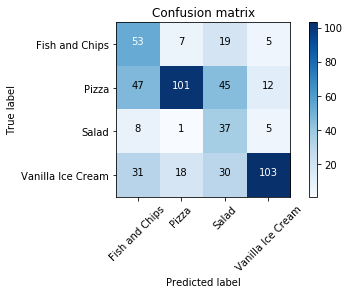

In [14]:
matrix = confusion_matrix(y_pred,y_tests)
plot_confusion_matrix(matrix,search.best_estimator_.classes_)


In [20]:
print(classification_report(y_pred, y_tests))

                   precision    recall  f1-score   support

   Fish and Chips       0.38      0.63      0.48        84
            Pizza       0.80      0.49      0.61       205
            Salad       0.28      0.73      0.41        51
Vanilla Ice Cream       0.82      0.57      0.67       182

      avg / total       0.69      0.56      0.59       522



In [21]:
print("Test Data accuracy  score", accuracy_score(y_pred, y_tests)*100,"%")

Test Data accuracy  score 56.3218390805 %


In [ ]:
%aimport src.plothelp
src.plothelp.plot_misclassified